# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import requests
import json
import random
from citipy import citipy
from pprint import pprint
from api_keys import g_key
from api_keys import weather_api_key
from sklearn.linear_model import LinearRegression

## Generate Cities List

In [3]:
#install citipy (once)
#!pip install citipy

#set up a dataframe
citylist = pd.DataFrame(columns=['Lat', 'Lng', 'City Name', 'Country Code'])
x = 0

#fill dataframe with random coords, request city, discard duplicates, until we have 500
while x < 500:
    lat = random.uniform(-90,90)
    lng = random.uniform(-180,180)
    city = citipy.nearest_city(lat,lng)
    city_name = city.city_name
    country_code = city.country_code
    citylist.loc[x, "Lat"] = lat
    citylist.loc[x, "Lng"] = lng
    citylist.loc[x, "City Name"] = city_name
    citylist.loc[x, "Country Code"] = country_code
    citylist=citylist.drop_duplicates(subset=['City Name', 'Country Code'], keep='first')
    x = len(citylist)
citylist.head()

    

,Lat,Lng,City Name,Country Code
0,11.3303,118.723,bacuit,ph
1,-81.5097,-39.2503,ushuaia,ar
2,66.954,-27.6385,olafsvik,is
3,-46.7627,-25.981,arraial do cabo,br
4,-3.19302,91.9446,sibolga,id


In [5]:
#set up weather api url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [8]:
#test run to see if we get the right data
city = citylist['City Name'][3]
response = requests.get(query_url + city).json()
temp = response['main']['temp_max']
temp

77

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
#set up for loop to get info from api request, also update to exact lat and long for each city
for x in range(500):
    try:
        city = citylist['City Name'][x]
        response = requests.get(query_url + city).json()
        temp = response['main']['temp_max']
        humidity = response['main']['humidity']
        clouds = response['clouds']['all']
        wind = response['wind']['speed']
        date = response['dt']
        lat_act = response['coord']['lat']
        lng_act = response['coord']['lon']
        citylist.loc[x, 'Lat']=lat_act
        citylist.loc[x, 'Lng']=lng_act
        citylist.loc[x, 'Temp']=temp
        citylist.loc[x, 'Humidity']=humidity
        citylist.loc[x, 'Clouds']=clouds
        citylist.loc[x, 'Wind']=wind
        citylist.loc[x, 'Date']=date
        print(f"{city} is {temp} F, {humidity} %humidity, {clouds} % clouds, and {wind} mph winds, date: {date}.")
        print("------------")
    except KeyError:
        print(f"No data for {city} available")
        print("------------")
       


No data for bacuit available
------------
ushuaia is 46.4 F, 49 %humidity, 75 % clouds, and 4.7 mph winds, date: 1601247631.
------------
olafsvik is 44.83 F, 83 %humidity, 29 % clouds, and 9.37 mph winds, date: 1601247631.
------------
arraial do cabo is 77 F, 78 %humidity, 0 % clouds, and 13.87 mph winds, date: 1601247327.
------------
sibolga is 76.24 F, 71 %humidity, 99 % clouds, and 2.89 mph winds, date: 1601247632.
------------
bela is 78.19 F, 71 %humidity, 0 % clouds, and 1.88 mph winds, date: 1601247633.
------------
chuy is 60.3 F, 88 %humidity, 76 % clouds, and 12.03 mph winds, date: 1601247633.
------------
lukulu is 73.11 F, 27 %humidity, 22 % clouds, and 2.55 mph winds, date: 1601247633.
------------
rikitea is 74.46 F, 80 %humidity, 0 % clouds, and 12.64 mph winds, date: 1601247634.
------------
moose factory is 60.8 F, 87 %humidity, 75 % clouds, and 9.17 mph winds, date: 1601247634.
------------
maceio is 77 F, 83 %humidity, 40 % clouds, and 5.82 mph winds, date: 160124

kapaa is 86 F, 62 %humidity, 40 % clouds, and 11.41 mph winds, date: 1601247663.
------------
la tuque is 67.41 F, 80 %humidity, 100 % clouds, and 9.01 mph winds, date: 1601247663.
------------
No data for nizhneyansk available
------------
saint george is 90 F, 18 %humidity, 1 % clouds, and 3.36 mph winds, date: 1601247420.
------------
goderich is 75 F, 42 %humidity, 86 % clouds, and 4 mph winds, date: 1601247664.
------------
dikson is 36.91 F, 79 %humidity, 100 % clouds, and 26.37 mph winds, date: 1601247664.
------------
mataura is 37.99 F, 96 %humidity, 100 % clouds, and 1.01 mph winds, date: 1601247665.
------------
taft is 75.2 F, 17 %humidity, 40 % clouds, and 4.7 mph winds, date: 1601247665.
------------
east london is 56.66 F, 60 %humidity, 75 % clouds, and 4.63 mph winds, date: 1601247665.
------------
bambous virieux is 72 F, 88 %humidity, 40 % clouds, and 8.05 mph winds, date: 1601247666.
------------
amot is 52 F, 92 %humidity, 42 % clouds, and 3.33 mph winds, date: 1601

roma is 78.8 F, 54 %humidity, 1 % clouds, and 9.17 mph winds, date: 1601247495.
------------
russell is 78.8 F, 69 %humidity, 40 % clouds, and 11.41 mph winds, date: 1601247605.
------------
bonthe is 77.54 F, 89 %humidity, 100 % clouds, and 5.79 mph winds, date: 1601247693.
------------
miquelon is 59.32 F, 92 %humidity, 83 % clouds, and 17.45 mph winds, date: 1601247693.
------------
beni suef is 79.43 F, 45 %humidity, 0 % clouds, and 13.58 mph winds, date: 1601247694.
------------
castro is 66.2 F, 85 %humidity, 98 % clouds, and 10.92 mph winds, date: 1601247648.
------------
bundaberg is 68 F, 52 %humidity, 0 % clouds, and 10.29 mph winds, date: 1601247694.
------------
egvekinot is 31.53 F, 85 %humidity, 0 % clouds, and 1.86 mph winds, date: 1601247695.
------------
de-kastri is 54.34 F, 74 %humidity, 0 % clouds, and 5.79 mph winds, date: 1601247695.
------------
sayansk is 38.17 F, 95 %humidity, 94 % clouds, and 5.75 mph winds, date: 1601247696.
------------
redlands is 93.99 F, 

deception bay is 68 F, 54 %humidity, 12 % clouds, and 7 mph winds, date: 1601247724.
------------
bronnoysund is 57.2 F, 71 %humidity, 35 % clouds, and 11.41 mph winds, date: 1601247724.
------------
amga is 45.84 F, 75 %humidity, 98 % clouds, and 5.23 mph winds, date: 1601247724.
------------
novyy urengoy is 38.05 F, 76 %humidity, 72 % clouds, and 16.4 mph winds, date: 1601247725.
------------
sampit is 74.19 F, 95 %humidity, 100 % clouds, and 1.59 mph winds, date: 1601247725.
------------
meulaboh is 75.79 F, 88 %humidity, 100 % clouds, and 4.45 mph winds, date: 1601247726.
------------
port lincoln is 58.64 F, 69 %humidity, 84 % clouds, and 20.4 mph winds, date: 1601247464.
------------
trinidad is 93.2 F, 52 %humidity, 20 % clouds, and 4.16 mph winds, date: 1601247713.
------------
flinders is 57.99 F, 66 %humidity, 1 % clouds, and 4 mph winds, date: 1601247470.
------------
khani is 64.4 F, 77 %humidity, 0 % clouds, and 2.24 mph winds, date: 1601247726.
------------
college is 57

vila is 50 F, 82 %humidity, 0 % clouds, and 5.06 mph winds, date: 1601247754.
------------
luganville is 82.4 F, 74 %humidity, 40 % clouds, and 2.24 mph winds, date: 1601247534.
------------
bayji is 78.24 F, 28 %humidity, 0 % clouds, and 7.34 mph winds, date: 1601247754.
------------
brownsville is 91.4 F, 62 %humidity, 1 % clouds, and 18.34 mph winds, date: 1601247536.
------------
champerico is 75.2 F, 100 %humidity, 90 % clouds, and 4.7 mph winds, date: 1601247755.
------------
esperance is 51.8 F, 100 %humidity, 40 % clouds, and 8.05 mph winds, date: 1601247755.
------------
half moon bay is 91.99 F, 36 %humidity, 1 % clouds, and 17.22 mph winds, date: 1601247756.
------------
osoyoos is 68 F, 32 %humidity, 20 % clouds, and 4.18 mph winds, date: 1601247756.
------------
mersing is 75.2 F, 94 %humidity, 99 % clouds, and 4.7 mph winds, date: 1601247756.
------------
inirida is 76.8 F, 92 %humidity, 98 % clouds, and 0.78 mph winds, date: 1601247757.
------------
mackenzie is 42.8 F, 

------------
antofagasta is 59 F, 72 %humidity, 40 % clouds, and 17.22 mph winds, date: 1601247617.
------------
tuatapere is 37.99 F, 96 %humidity, 100 % clouds, and 1.01 mph winds, date: 1601247783.
------------
ostrovnoy is 39.85 F, 83 %humidity, 8 % clouds, and 9.17 mph winds, date: 1601247783.
------------
port-gentil is 78.8 F, 74 %humidity, 40 % clouds, and 11.41 mph winds, date: 1601247784.
------------
coos bay is 77 F, 64 %humidity, 1 % clouds, and 21.92 mph winds, date: 1601247784.
------------
azul is 53.01 F, 76 %humidity, 88 % clouds, and 4 mph winds, date: 1601247499.
------------
pampa is 69.8 F, 30 %humidity, 90 % clouds, and 29.97 mph winds, date: 1601247785.
------------
maragogi is 75.87 F, 90 %humidity, 100 % clouds, and 9.35 mph winds, date: 1601247656.
------------
wangqing is 55.85 F, 83 %humidity, 18 % clouds, and 2.06 mph winds, date: 1601247785.
------------
ledyard is 72 F, 94 %humidity, 90 % clouds, and 5.82 mph winds, date: 1601247786.
------------
atambua

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
citylist.to_csv ('../output_data/citylist.csv', index = False, header=True)

In [11]:
#let's take a look:
citylist.head(15)

,Lat,Lng,City Name,Country Code,Temp,Humidity,Clouds,Wind,Date
0,11.3303,118.723,bacuit,ph,NaN,NaN,NaN,NaN,NaN
1,-54.8,-68.3,ushuaia,ar,46.40,49.0,75.0,4.70,1.601248e+09
2,64.89,-23.71,olafsvik,is,44.83,83.0,29.0,9.37,1.601248e+09
3,-22.97,-42.03,arraial do cabo,br,77.00,78.0,0.0,13.87,1.601247e+09
4,1.74,98.78,sibolga,id,76.24,71.0,99.0,2.89,1.601248e+09
5,25.93,81.98,bela,pk,78.19,71.0,0.0,1.88,1.601248e+09
6,-33.7,-53.46,chuy,uy,60.30,88.0,76.0,12.03,1.601248e+09
7,-14.37,23.24,lukulu,zm,73.11,27.0,22.0,2.55,1.601248e+09
8,-23.12,-134.97,rikitea,pf,74.46,80.0,0.0,12.64,1.601248e+09
9,51.26,-80.61,moose factory,ca,60.80,87.0,75.0,9.17,1.601248e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#dropping rows for which we couldn't get weather data
citylist_clean = citylist.dropna()
citylist_clean.head(15)

,Lat,Lng,City Name,Country Code,Temp,Humidity,Clouds,Wind,Date
1,-54.8,-68.3,ushuaia,ar,46.40,49.0,75.0,4.70,1.601248e+09
2,64.89,-23.71,olafsvik,is,44.83,83.0,29.0,9.37,1.601248e+09
3,-22.97,-42.03,arraial do cabo,br,77.00,78.0,0.0,13.87,1.601247e+09
4,1.74,98.78,sibolga,id,76.24,71.0,99.0,2.89,1.601248e+09
5,25.93,81.98,bela,pk,78.19,71.0,0.0,1.88,1.601248e+09
6,-33.7,-53.46,chuy,uy,60.30,88.0,76.0,12.03,1.601248e+09
7,-14.37,23.24,lukulu,zm,73.11,27.0,22.0,2.55,1.601248e+09
8,-23.12,-134.97,rikitea,pf,74.46,80.0,0.0,12.64,1.601248e+09
9,51.26,-80.61,moose factory,ca,60.80,87.0,75.0,9.17,1.601248e+09
10,-9.67,-35.74,maceio,br,77.00,83.0,40.0,5.82,1.601247e+09


In [13]:
len(citylist_clean)

465

In [14]:
#  Get the indices of cities that have humidity over 100%.
indices=(citylist_clean[citylist_clean['Humidity']>100.0].index.values)
indices    

array([], dtype=int64)

In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data= citylist_clean.drop(labels=None, axis=0, index=indices, columns=None, level=None, inplace=False, errors='raise')
clean_city_data.head(15)

,Lat,Lng,City Name,Country Code,Temp,Humidity,Clouds,Wind,Date
1,-54.8,-68.3,ushuaia,ar,46.40,49.0,75.0,4.70,1.601248e+09
2,64.89,-23.71,olafsvik,is,44.83,83.0,29.0,9.37,1.601248e+09
3,-22.97,-42.03,arraial do cabo,br,77.00,78.0,0.0,13.87,1.601247e+09
4,1.74,98.78,sibolga,id,76.24,71.0,99.0,2.89,1.601248e+09
5,25.93,81.98,bela,pk,78.19,71.0,0.0,1.88,1.601248e+09
6,-33.7,-53.46,chuy,uy,60.30,88.0,76.0,12.03,1.601248e+09
7,-14.37,23.24,lukulu,zm,73.11,27.0,22.0,2.55,1.601248e+09
8,-23.12,-134.97,rikitea,pf,74.46,80.0,0.0,12.64,1.601248e+09
9,51.26,-80.61,moose factory,ca,60.80,87.0,75.0,9.17,1.601248e+09
10,-9.67,-35.74,maceio,br,77.00,83.0,40.0,5.82,1.601247e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

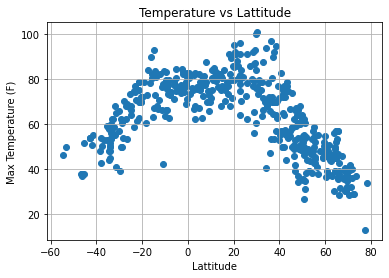

In [18]:
lattitude = clean_city_data['Lat']
max_temp = clean_city_data['Temp']
plt.scatter(lattitude, max_temp)
plt.xlabel('Lattitude')
plt.ylabel('Max Temperature (F)')
plt.title('Temperature vs Lattitude')
plt.grid(which='major', axis='both')
plt.savefig('../output_data/lat_vs_temp_full.png')
plt.show()
#graph shows a nice parabola, with greatest temperature at around lattitude = 0

## Latitude vs. Humidity Plot

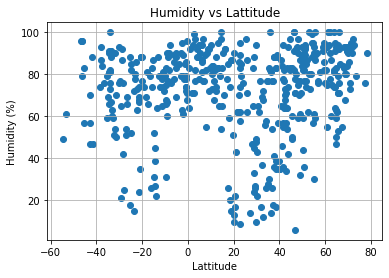

In [19]:
humidity = clean_city_data['Humidity']
plt.scatter(lattitude, humidity)
plt.xlabel('Lattitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs Lattitude')
plt.grid(which='major', axis='both')
plt.savefig('../output_data/lat_vs_hum_full.png')
plt.show()

## Latitude vs. Cloudiness Plot

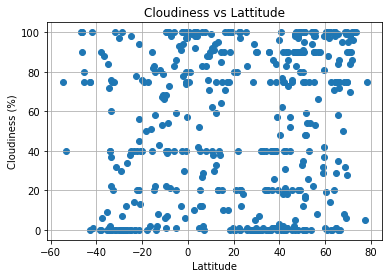

In [21]:
clouds = clean_city_data['Clouds']
plt.scatter(lattitude, clouds)
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness vs Lattitude')
plt.grid(which='major', axis='both')
plt.savefig('../output_data/lat_vs_cloud_full.png')
plt.show()

## Latitude vs. Wind Speed Plot

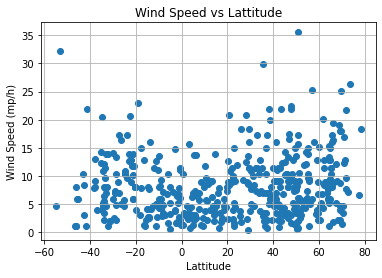

In [22]:
wind_speed = clean_city_data['Wind']
plt.scatter(lattitude, wind_speed)
plt.xlabel('Lattitude')
plt.ylabel('Wind Speed (mp/h)')
plt.title('Wind Speed vs Lattitude')
plt.grid(which='major', axis='both')
plt.savefig('../output_data/lat_vs_wind_full.png')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

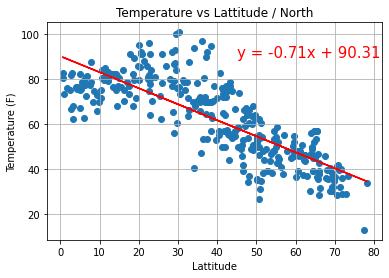

The r value is -0.8010611123426356.


In [24]:
north_lat = clean_city_data.loc[(clean_city_data['Lat']>=0), 'Lat'].astype(np.float)
north_temp = clean_city_data.loc[(clean_city_data['Lat']>=0), 'Temp'].astype(np.float)
x=north_lat
y=north_temp

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq,(45,90),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Temperature (F)')
plt.title('Temperature vs Lattitude / North')
plt.grid(which='major', axis='both')

plt.savefig('../output_data/lat_vs_temp_north.png')
plt.show()
print(f"The r value is {rvalue}.")
#strong correlation (r = -0.8) showing a decrease in temperature as you move away (north) from the equator

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

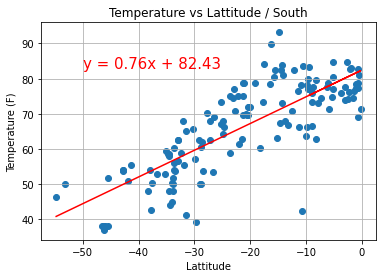

The r value is 0.7978283884088203.


In [29]:
south_lat = clean_city_data.loc[(clean_city_data['Lat']<=0), 'Lat'].astype(np.float)
south_temp = clean_city_data.loc[(clean_city_data['Lat']<=0), 'Temp'].astype(np.float)
x=south_lat
y=south_temp

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq,(-50,83),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Temperature (F)')
plt.title('Temperature vs Lattitude / South')
plt.grid(which='major', axis='both')

plt.savefig('../output_data/lat_vs_temp_south.png')
plt.show()
print(f"The r value is {rvalue}.")
#strong correlation (r = 0.8) that shows increasing temperatures from southern hemisphere toward equator

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

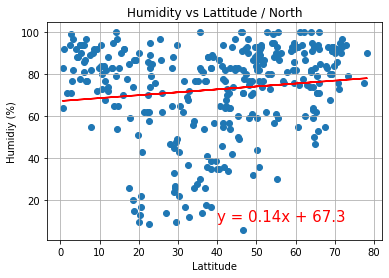

The r value is 0.12662347216988043.


In [30]:
north_lat = clean_city_data.loc[(clean_city_data['Lat']>=0), 'Lat'].astype(np.float)
north_hum = clean_city_data.loc[(clean_city_data['Lat']>=0), 'Humidity'].astype(np.float)
x=north_lat
y=north_hum

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Humidiy (%)')
plt.title('Humidity vs Lattitude / North')
plt.grid(which='major', axis='both')

plt.savefig('../output_data/lat_vs_hum_north.png')
plt.show()
print(f"The r value is {rvalue}.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

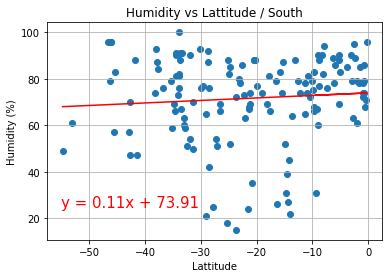

The r value is 0.07905673085246902.


In [33]:
south_lat = clean_city_data.loc[(clean_city_data['Lat']<=0), 'Lat'].astype(np.float)
south_hum = clean_city_data.loc[(clean_city_data['Lat']<=0), 'Humidity'].astype(np.float)
x=south_lat
y=south_hum

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs Lattitude / South')
plt.grid(which='major', axis='both')

plt.savefig('../output_data/lat_vs_hum_south.png')
plt.show()
print(f"The r value is {rvalue}.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

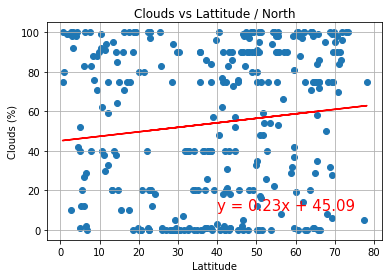

The r value is 0.11986883482564695.


In [34]:
north_lat = clean_city_data.loc[(clean_city_data['Lat']>=0), 'Lat'].astype(np.float)
north_cloud = clean_city_data.loc[(clean_city_data['Lat']>=0), 'Clouds'].astype(np.float)
x=north_lat
y=north_cloud

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Clouds (%)')
plt.title('Clouds vs Lattitude / North')
plt.grid(which='major', axis='both')

plt.savefig('../output_data/lat_vs_cloud_north.png')
plt.show()
print(f"The r value is {rvalue}.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

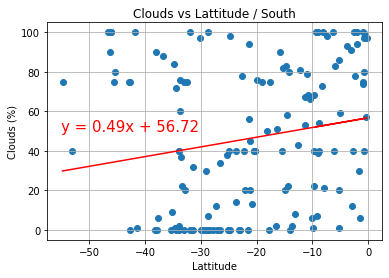

The r value is 0.1831219271344141.


In [37]:
south_lat = clean_city_data.loc[(clean_city_data['Lat']<=0), 'Lat'].astype(np.float)
south_cloud = clean_city_data.loc[(clean_city_data['Lat']<=0), 'Clouds'].astype(np.float)
x=south_lat
y=south_cloud

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq,(-55,50),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Clouds (%)')
plt.title('Clouds vs Lattitude / South')
plt.grid(which='major', axis='both')

plt.savefig('../output_data/lat_vs_cloud_south.png')
plt.show()
print(f"The r value is {rvalue}.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

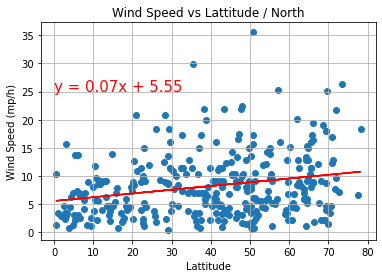

The r value is 0.24047793647765683.


In [38]:
north_lat = clean_city_data.loc[(clean_city_data['Lat']>=0), 'Lat'].astype(np.float)
north_wind = clean_city_data.loc[(clean_city_data['Lat']>=0), 'Wind'].astype(np.float)
x=north_lat
y=north_wind

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Wind Speed (mp/h)')
plt.title('Wind Speed vs Lattitude / North')
plt.grid(which='major', axis='both')

plt.savefig('../output_data/lat_vs_wind_north.png')
plt.show()
print(f"The r value is {rvalue}.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

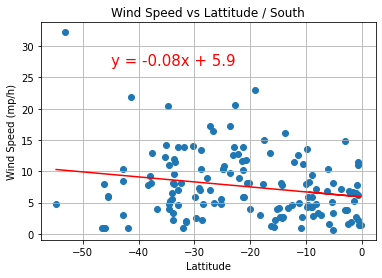

The r value is -0.21078672499602058.


In [39]:
south_lat = clean_city_data.loc[(clean_city_data['Lat']<=0), 'Lat'].astype(np.float)
south_wind = clean_city_data.loc[(clean_city_data['Lat']<=0), 'Wind'].astype(np.float)
x=south_lat
y=south_wind

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq,(-45,27),fontsize=15,color="red")
plt.xlabel('Lattitude')
plt.ylabel('Wind Speed (mp/h)')
plt.title('Wind Speed vs Lattitude / South')
plt.grid(which='major', axis='both')

plt.savefig('../output_data/lat_vs_wind_south.png')
plt.show()

print(f"The r value is {rvalue}.")